## READING  & STACKING IMAGES

   - Here we will be using __`skimage`__ library to work with image data. It is popular python package designed for image processing. Below is the link where you can check various modules and function within this package.

Link: https://scikit-image.org/docs/dev/api/api.html

### `IMPORTING LIBRARIES`

In [1]:
import skimage
from skimage.io import imshow, imread, imsave
from skimage.transform import resize
import numpy as np

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 

In [2]:
print('Skimage Version:', skimage.__version__)

Skimage Version: 0.15.0


<br>

### `DIFFERENT TYPES OF IMAGE `

> > __`LOADING GRAYSCALE IMAGE`__

In [3]:
# Reading an image 

image_grey = imread('image_gray.png')

In [4]:
# Checking shape of an image 

image_grey.shape

(28, 28)

In [5]:
# Getting image matrix

image_grey

Array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

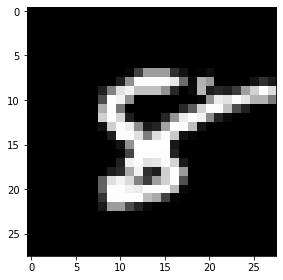

In [6]:
# Display image - As matrix of numbers does not helps us to understand what is teh image.

imshow(image_grey)

<br>

<br>

> > __` LOADING COLORED IMAGE `__

In [7]:
# Reading an image

image_rgb = imread('dog.jpg')

In [8]:
# Checking shape of an imag

image_rgb.shape

(340, 453, 3)

In [9]:
# Getting image matrix 

image_rgb

Array([[[ 57,  62,   8],
        [ 57,  62,   8],
        [ 57,  62,   8],
        ...,
        [140, 147,  79],
        [140, 147,  79],
        [140, 147,  79]],

       [[ 55,  60,   6],
        [ 55,  60,   6],
        [ 55,  60,   6],
        ...,
        [140, 147,  79],
        [140, 147,  79],
        [140, 147,  79]],

       [[ 53,  57,   6],
        [ 53,  57,   6],
        [ 53,  57,   6],
        ...,
        [140, 147,  79],
        [140, 147,  79],
        [140, 147,  79]],

       ...,

       [[ 58,  62,  12],
        [ 57,  60,  13],
        [ 56,  59,  12],
        ...,
        [234, 204, 176],
        [230, 200, 172],
        [227, 196, 168]],

       [[ 59,  63,  13],
        [ 57,  60,  13],
        [ 56,  59,  12],
        ...,
        [233, 203, 175],
        [231, 201, 173],
        [229, 198, 170]],

       [[ 59,  63,  13],
        [ 58,  61,  14],
        [ 57,  60,  13],
        ...,
        [232, 202, 174],
        [231, 201, 173],
        [230, 199, 171]]

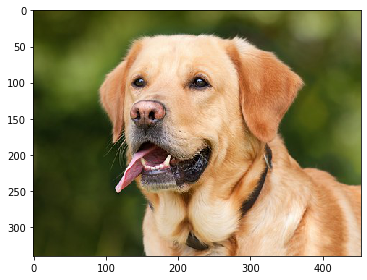

In [10]:
# Display image 

imshow(image_rgb)

    - There are multiple channels in the above image (red, green and blue) which are superimposed to get single image.
    
    - We want to print a single channel so let us look at how we will go about it.

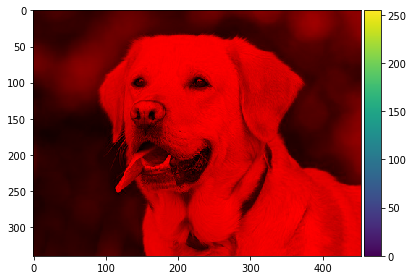

In [21]:
# Printing red channel

red_filter = [1,0,0]

imshow(image_rgb * red_filter)

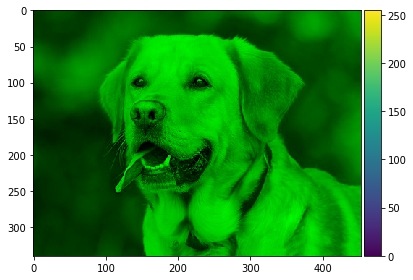

In [24]:
# Printing green channel

green_filter = [0,1,0]

imshow(image_rgb * green_filter)

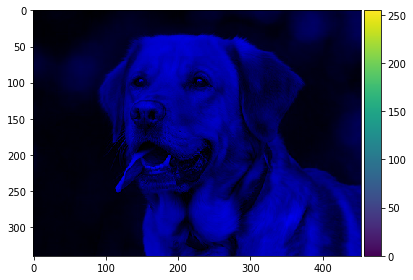

In [11]:
# Printing blue channel

blue_filter = [0, 0, 1]

imshow(image_rgb * blue_filter)

Now, instead of doing it manually by defining filters, imshow function gives us the parameter called as  __`cmap`__ where we just define the value as __`Reds, Blues or Green`__  taking all the values across height and width of the image and only one channel.

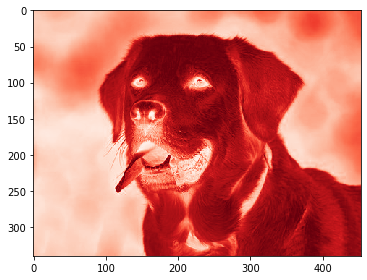

In [15]:
imshow(image_rgb[:, :, 0], cmap = 'Reds')

<br>

<br>

> > __`LOADING RGBA IMAGE`__

In [24]:
# Reading an image 

image_rgba = imread('mid_alpha.png')

In [25]:
# Checking shape of an image 

image_rgba.shape

(340, 453, 4)

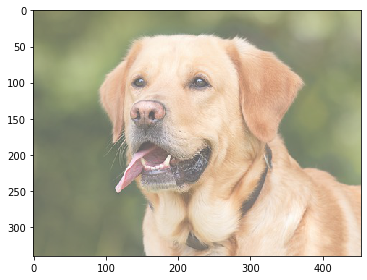

In [26]:
# Displaying image 

imshow(image_rgba)

In [27]:
# Getting only alpha values (0 - red, 1 - green, 2 - blue, 3 - alpha)

image_rgba[:, :, 3]

Array([[160, 160, 160, ..., 160, 160, 160],
       [160, 160, 160, ..., 160, 160, 160],
       [160, 160, 160, ..., 160, 160, 160],
       ...,
       [160, 160, 160, ..., 160, 160, 160],
       [160, 160, 160, ..., 160, 160, 160],
       [160, 160, 160, ..., 160, 160, 160]], dtype=uint8)

In [28]:
# Manipulating the alpha value 

image_rgba[:, :, 3] = image_rgba[:, :, 3] * 100

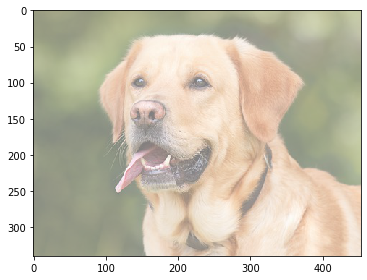

In [29]:
# Display image 

imshow(image_rgba)

<br>

> > __`LOADING MRI IMAGE`__

    - For using MRI image we will be using a library called as nibabel.
    
    - We cannot use skimage package to read MRI images, so we use nibabel, a python package to deal with neuro images.

In [31]:
import nibabel as nib
print('Nibabel Version:', nib.__version__)

Nibabel Version: 3.1.1


In [32]:
# We use load() instead of imread() to read an image.
# Extension of an image is hdr (High Dynamic Range) as we store multiple images which are slices in MRI.
# load() will just load an image but it is not loaded in an array format. So to load it in array format we use get_data()

image_mri = nib.load('sM00223_002.hdr')
image_mri = image_mri.get_data()

In [33]:
# Checking shape of an image.

image_mri.shape

(256, 256, 54, 1)

In [34]:
# To remove the 4th dimesion as it does not hold any importance.

image_mri = image_mri.squeeze()
image_mri.shape

(256, 256, 54)

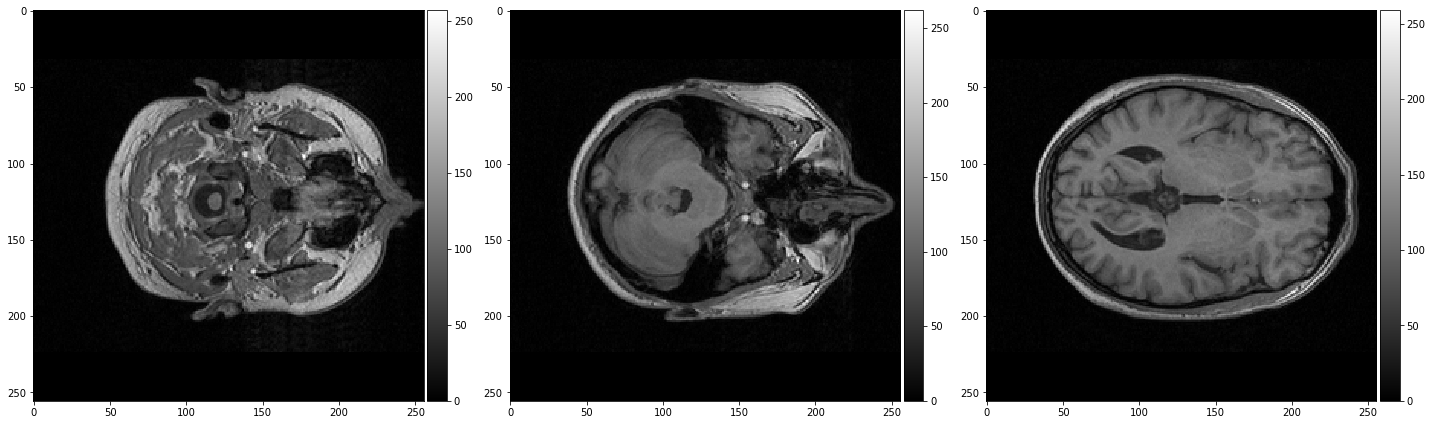

In [44]:
# Visualizing Images 

plt.figure(figsize = (20, 20))

plt.subplot(1,3,1)
imshow(image_mri[:, :, 00], cmap = 'gray')

plt.subplot(1,3,2)
imshow(image_mri[:, :, 11], cmap = 'gray', )

plt.subplot(1,3,3)
imshow(image_mri[:, :, 23], cmap = 'gray')

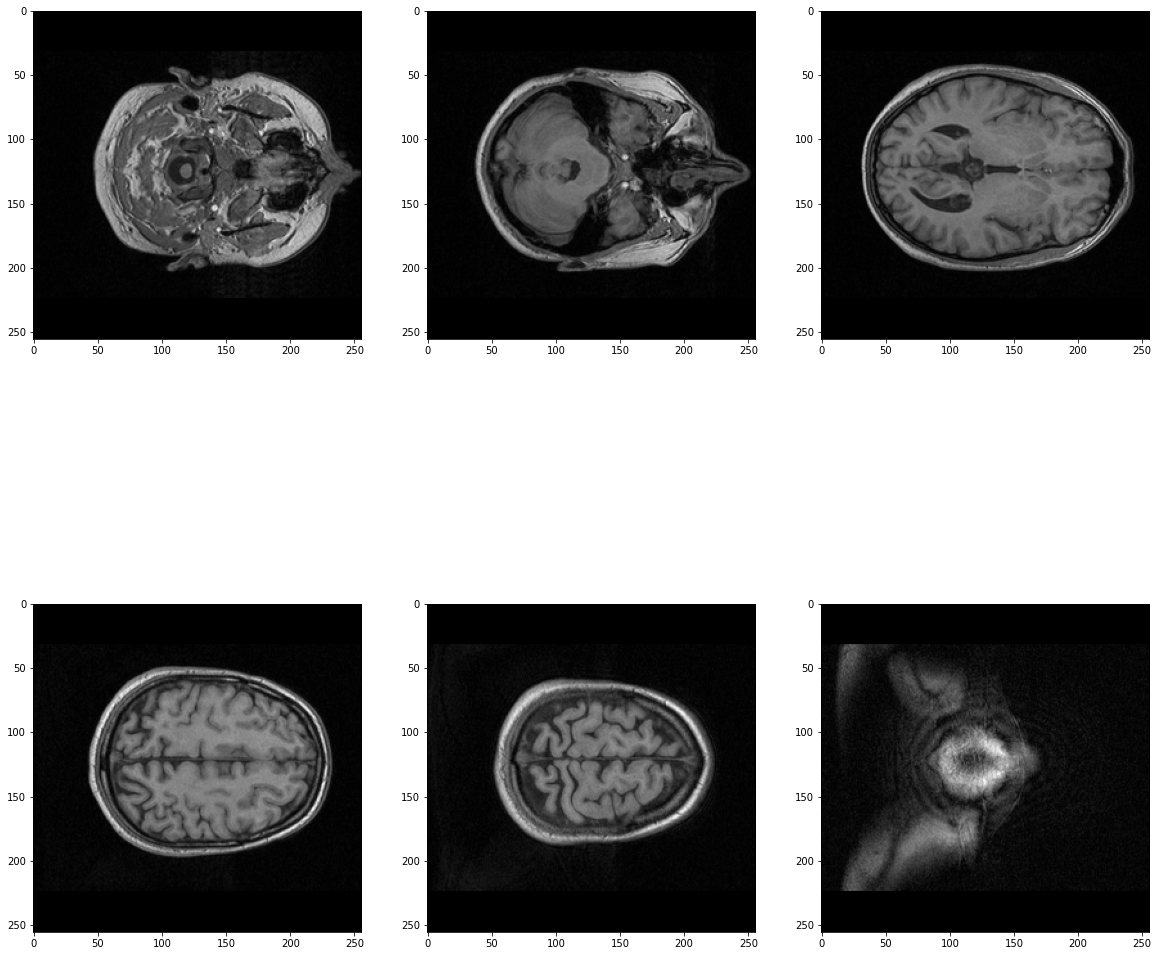

In [42]:
# Visualizing Images

import matplotlib.pyplot as plt

fig,ax = plt.subplots(nrows=2,ncols=3, figsize=(20,20))

ax[0,0].imshow(image_mri[:, :, 00], cmap = 'gray')
ax[0,1].imshow(image_mri[:, :, 11], cmap = 'gray')
ax[0,2].imshow(image_mri[:, :, 23], cmap = 'gray')
ax[1,0].imshow(image_mri[:, :, 37], cmap = 'gray')
ax[1,1].imshow(image_mri[:, :, 42], cmap = 'gray')
ax[1,2].imshow(image_mri[:, :, 51], cmap = 'gray')

<br>

Suppose we want to read multiple images eg. say 10 images, we can go ahead and write 10 imread() to read images. Imagine if we have more than 10 images it won't be advisable to write multiple times the same function. So to handle this we use __`glob`__ package from python which helps us to retrive the images with same or matching pattern.

In [46]:
# Reading multiple images

from glob import glob
image_name = glob("*.jpg")

In [47]:
# Checking nos of images.

image_name

['beagle-dog.jpg', 'car-49278_960_720.jpg', 'dog.jpg']

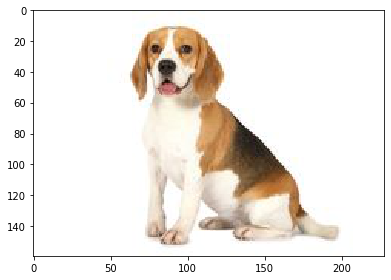

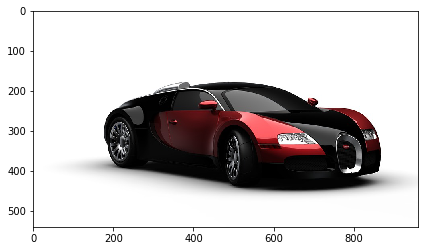

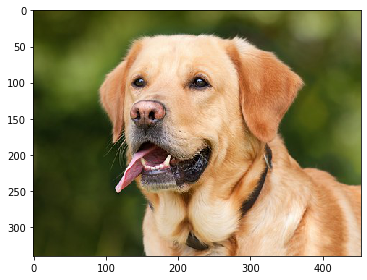

In [72]:
# Viewing images 

image_list=[]

for i in image_name:
  image = imread(i)
  imshow(image)
  plt.show()
  image_list.append(image)

final_images = np.array(image_list)


In [68]:
# Checking shape 

final_images.shape

(3,)

    Here if we see final_images was not able to print height and width as all the images were of differnet length.

In [70]:
final_images[0].shape, final_images[1].shape, final_images[2].shape

((160, 228, 3), (540, 960, 3), (340, 453, 3))

<br>

### `CHALLENGE 1 - DIFFERENT SIZE IMAGES`

 - One of the common challenges that we might come across in future is have diferent images of different sizes and we want all of them to get resize.

In [73]:
final_resized = []

for i in range (0,3):
  temp = resize(final_images[i], (340, 450))
  final_resized.append(temp)

final_resized = np.array(final_resized)

In [74]:
# Print shape -> (nos of images, height, width, channels)

final_resized.shape

(3, 340, 450, 3)

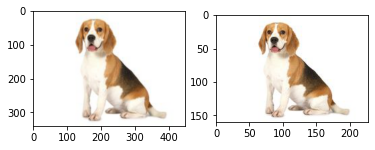

In [78]:
# Visualizing images

import matplotlib.pyplot as plt

fig,ax = plt.subplots(nrows=1, ncols=2)

ax[0].imshow(final_resized[0]) # Resized  Image 
ax[1].imshow(final_images[0])  # Original Image

In [80]:
# Saving Image 

imsave('resized_beagel.jpg', final_resized[0])

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
